In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
#import datetime
import katpoint
import numpy as np
import time as time
import pandas as pd
import math
import colorama
from colorama import Fore

ModuleNotFoundError: No module named 'colorama'

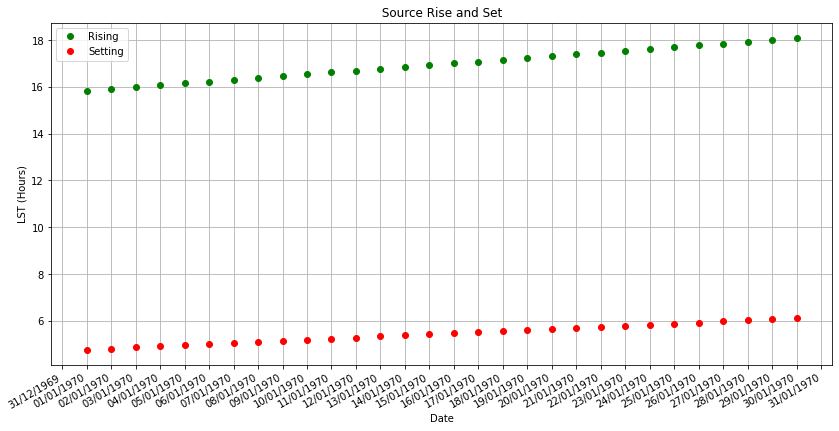

In [14]:

def rise_set(timestamp):
    site = katpoint.Antenna("m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5") # the site position using one antenna(m000)
    site.observer.date=katpoint.Timestamp(timestamp).to_ephem_date() # Set time
    site.observer.horizon='00:00:00.0' # Set horizon
    observer = site.observer 
    Sun= katpoint.Target("Sun,special")# Make sun object
    ephem_sun = Sun.body #Sun as an object
    ephem_sun.compute(observer) #compute for position of the observer
    return observer.next_rising(ephem_sun),observer.next_setting(ephem_sun)

site = katpoint.Antenna("m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5")
settime,risetime = np.zeros((30,2)),np.zeros((30,2))
for day in range(30):
    #timestamp = katpoint.Timestamp() + 24*60*60*day
    time_ = dt.datetime(2023, 2, 21,0,0,0)
    t = dt.datetime.timestamp(time_)
    timestamp = t + 24*60*60*day
    #print(timestamp)
    rise_time,set_time = rise_set(timestamp)
    risetime[day] =katpoint.Timestamp(rise_time),np.degrees(site.local_sidereal_time(rise_time))/15.
    settime[day] =katpoint.Timestamp(set_time),np.degrees(site.local_sidereal_time(set_time))/15.
    # Array values are unix time and decimal LST time in hours


fig = plt.figure(figsize=(14,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

dates=[dt.datetime.fromtimestamp(ts) for ts in risetime[:,0]]
plt.plot(risetime[:,1],'go',label="Rising")
dates2=[dt.datetime.fromtimestamp(ts) for ts in settime[:,0]]
plt.plot(settime[:,1],'ro',label="Setting")

plt.title(" Source Rise and Set ")
plt.ylabel('LST (Hours)')
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.grid()
plt.legend()


In [15]:
def nighttime(riset,sett):
    'Arranging LST rise and set time to show night time '
    ind1 = 0
    ind2 = -1
       
    rt_new = np.delete(riset, ind1)
    st_new = np.delete(sett,ind2)
    setrise = {}
    for i in range(len(riset)-1):
        setrise[i] = [st_new[i],rt_new[i]]
    return setrise

In [16]:
def nightobs(filename, datefile):
    'Extracting only night time observations\
    from a given file of observational information'
    ndates = []
    for j in range(len(datefile)):
        ndates.append(datefile[j].strftime('%Y-%m-%d'))
    data = pd.read_csv(filename)
    night_obs = data['night_obs']
    LST_starts = data['lst_start']
    LST_ends = data['lst_start_end']
    duration = data['simulated_duration']
    proposal_id = data['proposal_id']
    #proposal_id = sorted(proposal_id)
    ID = data['id']
    
    obs = {}
    for i in range(len(night_obs)):
        if night_obs[i] == 'Yes':
            obs[ID[i]] = [proposal_id[i],LST_starts[i],LST_ends[i],duration[i]]
    return obs,ndates

In [24]:
obs,date = nightobs('all_night_obs.csv', dates)
duration_ = []
LST_start = []
LST_end = []
obs_id = []
for i in obs.values():
    duration_.append(round(i[3]/3600,2))    
    g1 = i[1].replace(':', '.')
    f1 = float(g1)
    LST_start.append(f1)
    g2 = i[2].replace(':', '.') 
    f2 = float(g2)
    LST_end.append(f2)
    obs_id.append(i[0])

#duration_ = [item for item in duration_ if not(math.isnan(item)) == True] #removing nan
duration_ = [0 if math.isnan(x) else x for x in duration_]
#duration_.insert(-2,0)

print(LST_start)
print(LST_end)
print(duration_)
print(obs_id)

[19.45, 20.3, 14.0, 23.15, 14.0, 23.0, 9.0, 9.0, 9.0, 8.1, 8.1, 5.23, 5.23, 12.0, 12.0, 7.4, 20.0, 1.3, 13.0, 3.0, 14.0, 9.0, 2.2, 19.03, 22.29, 12.0, 23.15, 23.3, 17.55, 19.45, 11.35, 20.47, 21.45, 19.45, 19.17, 19.54, 18.0, 12.3, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 21.2, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 8.0, 11.0, 14.52, 20.0, 1.3, 9.0, 9.0, 5.05, 1.5, 22.07, 1.5, 22.07, 20.0, 22.0, 0.53, 2.15, 20.55, 18.1, 22.3, 22.3, 22.3, 22.3, 22.3, 18.1, 18.1, 18.1, 18.1, 19.3, 5.3, 5.3, 5.3, 22.15, 23.0, 22.15, 22.15, 22.15, 22.15, 23.0, 6.4, 6.0, 5.05, 23.0, 18.36, 1.3, 18.54, 18.2, 18.24, 18.2, 18.36, 7.45, 0.0, 19.54, 19.17, 11.45, 11.45, 11.45, 11.45, 11.45, 11.45, 11.15, 22.07, 12.0, 12.3, 10.0, 9.0, 6.3, 6.0, 5.3, 1.5, 11.4, 12.0, 12.0, 9.3, 9.0, 8.0, 6.0, 18.48, 21.45, 19.45, 20.47, 9.55, 21.05, 6.0, 12.0, 8.3, 18.37, 17.15, 7.3, 5.4, 7.3, 5.3, 5.4, 3.4, 22.0, 20.0, 23.11, 12.0, 13.0, 5.3, 23.46, 17.32, 6.0, 9.51, 8.19, 8

In [18]:
obs

{20221202082558: ['SCI-20220822-DP-01', '19:45', '23:55', 21400.0],
 20221128085912: ['SCI-20220822-KK-01', '20:30', '23:50', 26469.0],
 20221122153927: ['SCI-20220822-CV-01', '14:00', '23:00', 9278.0],
 20221121190323: ['SCI-20220822-TJ-01', '23:15', '1:00', 14147.0],
 20221114110116: ['SCI-20220822-CV-01', '14:00', '23:00', 9472.0],
 20221108210952: ['SCI-20220822-RI-01', '23:00', '3:14', 10878.0],
 20221106185438: ['SCI-20220822-CV-01', '9:00', '16:00', 9407.0],
 20221106184558: ['SCI-20220822-CV-01', '9:00', '16:00', 9334.0],
 20221106182754: ['SCI-20220822-CV-01', '9:00', '16:00', 9334.0],
 20221103104516: ['SCI-20220822-AB-01', '8:10', '9:00', 18230.0],
 20221103101730: ['SCI-20220822-AB-01', '8:10', '9:00', 18227.0],
 20221103101001: ['SCI-20220822-AB-01', '5:23', '5:50', 18338.0],
 20221103095709: ['SCI-20220822-AB-01', '5:23', '5:50', 18339.0],
 20221026191415: ['SCI-20220822-MS-02', '12:00', '16:30', 11112.0],
 20221025200551: ['SCI-20220822-MS-02', '12:00', '15:00', 16986.0]

In [19]:
rt = risetime[:,1]
st = settime[:,1]
SetRise = nighttime(rt,st)

print(SetRise)


SetRise.values()

{0: [4.7586684153398044, 15.912045812939562], 1: [4.807289404385963, 15.990723304031986], 2: [4.855670015112881, 16.069288534597824], 3: [4.903818444924977, 16.14774157386854], 4: [4.951742922709037, 16.226082766913883], 5: [4.9994517014218625, 16.304312780288676], 6: [5.0469530761780135, 16.382432665890843], 7: [5.094255396809873, 16.460443863323], 8: [5.141367074259785, 16.538348197035912], 9: [5.188296582451943, 16.616147845027076], 10: [5.235052443895644, 16.69384531381672], 11: [5.281643240656846, 16.771443422543932], 12: [5.328077612151284, 16.848945324959054], 13: [5.374364272611877, 16.92635449485296], 14: [5.42051203744881, 17.00367476753653], 15: [5.466529822838519, 17.080910285508327], 16: [5.5124266170746905, 17.158065448530547], 17: [5.558211435662323, 17.2351447933945], 18: [5.6038932524795735, 17.312152851096773], 19: [5.649480906446462, 17.38909399070793], 20: [5.69498300613804, 17.465972230093364], 21: [5.740407850744873, 17.542791128189776], 22: [5.7857633737617205, 1

dict_values([[4.7586684153398044, 15.912045812939562], [4.807289404385963, 15.990723304031986], [4.855670015112881, 16.069288534597824], [4.903818444924977, 16.14774157386854], [4.951742922709037, 16.226082766913883], [4.9994517014218625, 16.304312780288676], [5.0469530761780135, 16.382432665890843], [5.094255396809873, 16.460443863323], [5.141367074259785, 16.538348197035912], [5.188296582451943, 16.616147845027076], [5.235052443895644, 16.69384531381672], [5.281643240656846, 16.771443422543932], [5.328077612151284, 16.848945324959054], [5.374364272611877, 16.92635449485296], [5.42051203744881, 17.00367476753653], [5.466529822838519, 17.080910285508327], [5.5124266170746905, 17.158065448530547], [5.558211435662323, 17.2351447933945], [5.6038932524795735, 17.312152851096773], [5.649480906446462, 17.38909399070793], [5.69498300613804, 17.465972230093364], [5.740407850744873, 17.542791128189776], [5.7857633737617205, 17.619553699604303], [5.8310571625601915, 17.696262421840952], [5.87629

In [32]:
def obs_selection(s_set, s_rise, start_r, end_r, dur, observation_id):
    """ Check if the observation time range is within the LST time range.
    
    Parmeters:
    -------------
    s_set : float
        LST sun set
    s_rise : float
        LST sun rise
    start_r : float
        observation allowed start LST range
    end_r : float
        observation allowed end LST range
    dur : float 
        observation duration in hours
    """
    # check if observation start or end time is within the LST range
    cond1 = start_r >= s_set
    cond2 = end_r > s_set
    if  cond1 or cond2:
        if (cond1 and cond2) or cond1:
            start_time = start_r
            end_time = start_time + dur
        else:
            start_time = end_r
            end_time = start_time + dur
        if end_time > s_rise:
            return print(Fore.RED + '{} observation end time is outside the LST range'.format(observation_id))
        else:
            if end_time >= 24:
                end_time = end_time - 24
    else:
        return print('{} both start and the end time are outside the LST range'.format(observation_id))
    
    
    return print('Start time for {} is {} and end_time is {}'.format(observation_id, start_time, end_time))
    

In [33]:
ss = [i[0] for i in SetRise.values()] 
sr = [i[1] for i in SetRise.values()] 
a = 0
for ind in range(len(ss)):
    
    for ind2 in range(len(LST_start)):
        d = obs_selection(ss[ind], sr[ind], LST_start[ind2], LST_end[ind2], duration_[ind2], obs_id[ind2])
    print("End of Day ----------------------------> %d" %a)
    a += 1

NameError: name 'Fore' is not defined

In [17]:

print(ss)
print(sr)

[4.7586684153398044, 4.807289404385963, 4.855670015112881, 4.903818444924977, 4.951742922709037, 4.9994517014218625, 5.0469530761780135, 5.094255396809873, 5.141367074259785, 5.188296582451943, 5.235052443895644, 5.281643240656846, 5.328077612151284, 5.374364272611877, 5.42051203744881, 5.466529822838519, 5.5124266170746905, 5.558211435662323, 5.6038932524795735, 5.649480906446462, 5.69498300613804, 5.740407850744873, 5.7857633737617205, 5.8310571625601915, 5.876296490632869, 5.921488475273886, 5.966640235390174, 6.011759040146292, 6.056852333871874]
[15.912045812939562, 15.990723304031986, 16.069288534597824, 16.14774157386854, 16.226082766913883, 16.304312780288676, 16.382432665890843, 16.460443863323, 16.538348197035912, 16.616147845027076, 16.69384531381672, 16.771443422543932, 16.848945324959054, 16.92635449485296, 17.00367476753653, 17.080910285508327, 17.158065448530547, 17.2351447933945, 17.312152851096773, 17.38909399070793, 17.465972230093364, 17.542791128189776, 17.619553699

In [28]:
rt = risetime[:,1]
st = settime[:,1]

SetRise = nighttime(rt,st)
#print(len(SetRise))
for i in SetRise.values():
    settimes = i[0]
    risetimes = i[1]
    names = []
    for name in obs.keys():
        names.append(name)
    d_start = []
    d_end = []
    d_added_s = []
    d_added_e = []
    for ind, x in enumerate(LST_start):
        if x > settimes:
            d_added_s.append([x + duration_[ind], ind])


        elif LST_end[ind] > settimes:
             d_added_e.append([LST_end[ind] + duration_[ind], ind])

                
#Condition 1 based on the LST start time of the observation. 
    if len(d_added_s) != 0:
        sub_start = []
    
        for ind2 in range(len(d_added_s)):
            if d_added_s[ind2][0] > 24 and (d_added_s[ind2][0]-24) < risetimes:
                d_start.append(names[d_added_s[ind2][1]])
            else:
                d_start.append(names[d_added_s[ind2][1]])
    else:
        break

#Condition 2 based on the LST end time of the observation.    
    if len(d_added_e) != 0:
        sub_end = []

        for ind3 in range(len(d_added_e)):
            if d_added_e[ind3][0] > 24 and d_added_e[ind3][0]-24 < risetimes:
                d_end.append(names[d_added_e[ind3][1]])
            else:
                d_end.append(names[d_added_e[ind3][1]])
    else:
        break
                          
for j in obs.keys():
    if j in d_start:
        print("{} can run this month with LST start of {} due to condition 1 ".format(j, obs[j][1]))
    elif j in d_end:
        print("{} can run this month with LST start of {} due to condition 2".format(j, obs[j][0]))
        

20221202082558 can run this month with LST start of 19:45 due to condition 1 
20221128085912 can run this month with LST start of 20:30 due to condition 1 
20221122153927 can run this month with LST start of 14:00 due to condition 1 
20221121190323 can run this month with LST start of 23:15 due to condition 1 
20221114110116 can run this month with LST start of 14:00 due to condition 1 
20221108210952 can run this month with LST start of 23:00 due to condition 1 
20221106185438 can run this month with LST start of 9:00 due to condition 1 
20221106184558 can run this month with LST start of 9:00 due to condition 1 
20221106182754 can run this month with LST start of 9:00 due to condition 1 
20221103104516 can run this month with LST start of 8:10 due to condition 1 
20221103101730 can run this month with LST start of 8:10 due to condition 1 
20221026191415 can run this month with LST start of 12:00 due to condition 1 
20221025200551 can run this month with LST start of 12:00 due to cond

In [10]:
rt = risetime[:,1]
st = settime[:,1]
d_start = []
d_end = []
d_added_e = []
d_added_s = []
SetRise = nighttime(rt,st)
#print(len(SetRise))
for i in SetRise.values():
    #d_added_s = []
    settimes = i[0]
    risetimes = i[1]
    names = []
    for name in obs.keys():
        names.append(name)
    #d_added_s = []
    for ind, x in enumerate(LST_start):
        if settimes - risetimes > 0:
            if x > settimes and x - settimes > 0:
                d_added_s.append([x + duration_[ind], ind])
            elif 0 < x < risetimes:
                d_added_s.append([x + duration_[ind], ind])
            elif LST_end[ind] > settimes or 0 < LST_end[ind] < risetimes:
                d_added_e.append([LST_end[ind] + duration_[ind], ind])


        elif settimes - risetimes < 0:
            if x > settimes and 0 < x < risetimes:
                d_added_s.append([x + duration_[ind], ind])
            elif LST_end[ind] > settimes and 0 < x < risetimes:
                d_added_s.append([x + duration_[ind], ind])


                
#Condition 1 based on the LST start time of the observation. 
    if len(d_added_s) != 0:
        sub_start = []
    
        for ind2 in range(len(d_added_s)):
            if d_added_s[ind2][0] > 24 and (d_added_s[ind2][0]-24) < risetimes:
                d_start.append(names[d_added_s[ind2][1]])
            else:
                d_start.append(names[d_added_s[ind2][1]])
    else:
        break

#Condition 2 based on the LST end time of the observation.    
    if len(d_added_e) != 0:
        sub_end = []

        for ind3 in range(len(d_added_e)):
            if risetimes - d_added_e[ind3][0] >= duration_[ind3]:
                if d_added_e[ind3][0] > 24 and (d_added_e[ind3][0]-24) < risetimes:
                    d_end.append(names[d_added_e[ind3][1]])
                else:
                    d_end.append(names[d_added_e[ind3][1]])
    else:
        break
        
        

                          
for j in obs.keys():
    if j in d_start:
        print("{} can run this month with LST start of {} due to condition 1 ".format(j, obs[j][1]))
    elif j in d_end:
        print("{} can run this month with LST start of {} due to condition 2".format(j, obs[j][1]))
        

20221202082558 can run this month with LST start of 19:45 due to condition 1 
20221128085912 can run this month with LST start of 20:30 due to condition 1 
20221122153927 can run this month with LST start of 14:00 due to condition 1 
20221114110116 can run this month with LST start of 14:00 due to condition 1 
20221106185438 can run this month with LST start of 9:00 due to condition 1 
20221106184558 can run this month with LST start of 9:00 due to condition 1 
20221106182754 can run this month with LST start of 9:00 due to condition 1 
20221103104516 can run this month with LST start of 8:10 due to condition 1 
20221103101730 can run this month with LST start of 8:10 due to condition 1 
20221026191415 can run this month with LST start of 12:00 due to condition 1 
20221025200551 can run this month with LST start of 12:00 due to condition 1 
20221025194144 can run this month with LST start of 7:40 due to condition 1 
20221025025914 can run this month with LST start of 20:00 due to condi

In [ ]:
import time
